# Project #5：FM and bandwidth






(Due Date: 7/12/2023, class time)

Suhao Wang

Junjie Ren

## Functions


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec  2 15:31:47 2023
Finished on Thu Dec  7 17:44:30 2023

@author: Suhao Wang
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import math
    

# Define the message signal
def square_pulse(t,T1,dt,amplitude):
    return np.where((t >= T1-dt/2) & (t <= T1+dt/2), amplitude, 0)

# def message_signal(t,duration,Am):
#     #return np.where((t >= 0) , t, 0)
#     #return Am * np.sin(2 * np.pi * fm * t) 
#     return square_pulse(t,0,duration,Am)


# Generate the FM signal with kf, Fc and mt
def generate_fm_signal(t, Fs, m_t, mykf, myFc):
    # "np.cumsum(m_t) / Fs" is the integral "array" from -5 (the start of numpy array) to t
    phi_t = 2 * np.pi * myFc * t + 2*np.pi* mykf * np.cumsum(m_t) / Fs  # Phase deviation
    fm_signal = np.cos(phi_t)  # FM signal
    return fm_signal

### Numerical Approach
#   func. find_bandwidth integarte to get the approximated band width
#   The func. will return the approximated bandwidth
#   1. calculate bandwidth from Fc to left until 0 and from fc to right until "infinite"
#   2. make sure that fc>fm+kf*Am
def calculate_bandwidth(f, Y, center, accuracy):
    # parameters
    step = (max(f) - min(f)) / len(f)
    n = len(Y)
    n_half = math.floor(n / 2)
    energy = np.zeros(n)
    df = f[1]-f[0]
    step = df
    ## df is 0.1, step 0.099995


    # total energy in positive axis
    energy[0] = step * math.pow(Y[0], 2)
    for i in range(1, n_half):
        energy[i] = energy[i - 1] + step * math.pow(Y[i], 2)

    # band_energy we need in positive axis
    total_energy = energy[n_half-1]
    band_energy = accuracy * total_energy
    
    # move
    center_index = (int)(center*1/step)
    energy[0] = step * math.pow(Y[center_index], 2)

    for i in range(1, n_half-center_index):
        energy[i] = energy[i - 1] + step * math.pow(Y[i+center_index], 2)
        if center_index-i>=0:
            energy[i] = energy[i] + step * math.pow(Y[center_index-i], 2)

        if (energy[i]>band_energy):
            if (center_index-i>=0):
                bandwidth = f[i+center_index]-f[center_index-i]
            else:
                bandwidth = f[i+center_index]
            break

    return round(bandwidth,3)


In [8]:
# numerical values
T = 5
Fs = 2000                   # Sampling frequency (Hz)
t = np.arange(-T, T, 1/Fs)  # 1/Fs is the interval

## single call 

In [9]:
# Define the parameters

Fc = 10       # Carrier frequency (Hz)
kf = 10       # Frequency sensitivity (Hz/Volt), 
duration = 1  # rect(t/duration)
Am = 1        # the rectangular pulse amplitude is fixed to 1

# use functions
m_t = square_pulse(t,0,duration,Am)
fm_t = generate_fm_signal(t, Fs, m_t, kf, Fc)

f1 = fftfreq(len(m_t), d=1 / Fs)
X1 = fft(m_t)/Fs   #非周期函数归一化要乘以1/fs

f2 = fftfreq(len(fm_t), d=1 / Fs)
X2 = fft(fm_t)/len(fm_t)

cal_W = calculate_bandwidth(f1,abs(X1), 0, 0.99)
print(cal_W)

bandwidth_num = calculate_bandwidth(f2,abs(X2),Fc,0.99)
print(bandwidth_num)

bandwidth_theoretical = 2 * kf * Am + 2 * cal_W 
print(bandwidth_theoretical)




9.3
20.5
38.6


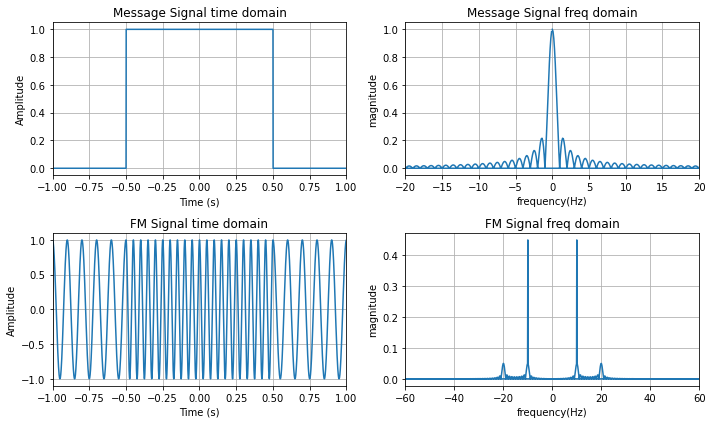

In [10]:
# Plot the message signal and FM signal
plt.figure(figsize=(10, 6))

# Message signal
plt.subplot(2, 2, 1)
plt.plot(t, m_t)
plt.title('Message Signal time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(-1,1)

plt.subplot(2, 2, 2)
plt.plot(f1, abs(X1))
plt.title('Message Signal freq domain')
plt.xlabel('frequency(Hz)')
plt.ylabel('magnitude')
plt.grid()
plt.xlim(-20,20)  

# FM signal
plt.subplot(2, 2, 3)
plt.plot(t, fm_t)
plt.title('FM Signal time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(-1,1) 

plt.subplot(2, 2, 4)
plt.plot(f2, abs(X2))
plt.title('FM Signal freq domain')
plt.xlabel('frequency(Hz)')
plt.ylabel('magnitude')
plt.grid()
plt.xlim(-60,60)  

plt.tight_layout()
plt.show()

## numerically call

In [11]:
# Define a function that takes the parameter as an input and performs the desired computation
# change T in rect(t/T)
def compute_table_value(parameter):
    # Perform computations or calculations based on the parameter value
    # Define the parameters

    Fc = 20       # Carrier frequency (Hz)
    kf = 10       # Frequency sensitivity (Hz/Volt), 
    # duration = 1  # rect(t/duration)
    Am = 1        # the rectangular pulse amplitude is fixed to 1

    m_t = square_pulse(t,0,parameter,Am)
    fm_t = generate_fm_signal(t,Fs,m_t,kf,Fc)

    f1 = fftfreq(len(m_t), d=1 / Fs)
    X1 = fft(m_t)/Fs   #非周期函数归一化要乘以1/fs
    f2 = fftfreq(len(fm_t), d=1 / Fs)
    X2 = fft(fm_t)/len(fm_t)
    
    cal_W = calculate_bandwidth(f1,abs(X1),0, 0.99)
    bandwidth_theoretical = 2 * kf * Am + 2 * cal_W 
    bandwidth_num = calculate_bandwidth(f2,abs(X2),Fc,0.99)

    return bandwidth_theoretical,bandwidth_num

# Define the range of values for the parameter
parameter_values = range(1, 100)  # Example range, modify according to your needs

# Generate the table by iterating over the parameter values
for value in parameter_values:
    # Compute the corresponding table value for each parameter value
    table_value,table_value2 = compute_table_value(value)
    error = round(np.abs(table_value-table_value2)/table_value * 100,1)
    # Print the parameter value and the corresponding table value
    print(f"T: {value}, carson's rule: {table_value}, cal_bandwidth:{table_value2}, error(%):{error}")

T: 1, carson's rule: 38.6, cal_bandwidth:21.0, error(%):45.6
T: 2, carson's rule: 28.4, cal_bandwidth:20.6, error(%):27.5
T: 3, carson's rule: 25.0, cal_bandwidth:20.8, error(%):16.8
T: 4, carson's rule: 23.6, cal_bandwidth:20.8, error(%):11.9
T: 5, carson's rule: 22.6, cal_bandwidth:20.6, error(%):8.8
T: 6, carson's rule: 22.2, cal_bandwidth:20.8, error(%):6.3
T: 7, carson's rule: 21.6, cal_bandwidth:20.8, error(%):3.7
T: 8, carson's rule: 21.4, cal_bandwidth:20.6, error(%):3.7
T: 9, carson's rule: 21.2, cal_bandwidth:21.0, error(%):0.9
T: 10, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 11, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 12, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 13, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 14, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 15, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 16, carson's rule: 20.2, cal_bandwidth:20.0, error(%):1.0
T: 17, carson's rule: 20.2, c

In [12]:
# Define a function that takes the parameter as an input and performs the desired computation
# change kf
def compute_table_value(parameter):
    # Perform computations or calculations based on the parameter value
    Fc = 150       # Carrier frequency (Hz)
    # kf = 10       # Frequency sensitivity (Hz/Volt), 
    duration = 4  # rect(t/duration)
    Am = 1        # the rectangular pulse amplitude is fixed to 1

    m_t = square_pulse(t,0,duration,Am)
    fm_t = generate_fm_signal(t,Fs,m_t,parameter,Fc)

    f1 = fftfreq(len(m_t), d=1 / Fs)
    X1 = fft(m_t)/Fs   #非周期函数归一化要乘以1/fs
    f2 = fftfreq(len(fm_t), d=1 / Fs)
    X2 = fft(fm_t)/len(fm_t)
    
    cal_W = calculate_bandwidth(f1,abs(X1),0, 0.99)
    bandwidth_theoretical = 2 * parameter * Am + 2 * cal_W 
    bandwidth_num = calculate_bandwidth(f2,abs(X2),Fc,0.99)

    return bandwidth_theoretical,bandwidth_num

# Define the range of values for the parameter
parameter_values = range(1, 100)  # Example range, modify according to your needs

# Generate the table by iterating over the parameter values
for value in parameter_values:
    # Compute the corresponding table value for each parameter value
    table_value,table_value2 = compute_table_value(value)
    error = round(np.abs(table_value-table_value2)/table_value * 100,1)
    # Print the parameter value and the corresponding table value
    print(f"kf: {value}, carson's rule: {table_value}, cal_bandwidth:{table_value2}, error(%):{error}")

kf: 1, carson's rule: 5.6, cal_bandwidth:2.4, error(%):57.1
kf: 2, carson's rule: 7.6, cal_bandwidth:4.6, error(%):39.5
kf: 3, carson's rule: 9.6, cal_bandwidth:6.6, error(%):31.2
kf: 4, carson's rule: 11.6, cal_bandwidth:8.8, error(%):24.1
kf: 5, carson's rule: 13.6, cal_bandwidth:10.8, error(%):20.6
kf: 6, carson's rule: 15.6, cal_bandwidth:12.8, error(%):17.9
kf: 7, carson's rule: 17.6, cal_bandwidth:14.8, error(%):15.9
kf: 8, carson's rule: 19.6, cal_bandwidth:16.8, error(%):14.3
kf: 9, carson's rule: 21.6, cal_bandwidth:18.8, error(%):13.0
kf: 10, carson's rule: 23.6, cal_bandwidth:20.8, error(%):11.9
kf: 11, carson's rule: 25.6, cal_bandwidth:22.8, error(%):10.9
kf: 12, carson's rule: 27.6, cal_bandwidth:24.8, error(%):10.1
kf: 13, carson's rule: 29.6, cal_bandwidth:26.8, error(%):9.5
kf: 14, carson's rule: 31.6, cal_bandwidth:28.8, error(%):8.9
kf: 15, carson's rule: 33.6, cal_bandwidth:30.8, error(%):8.3
kf: 16, carson's rule: 35.6, cal_bandwidth:32.8, error(%):7.9
kf: 17, cars